In [1]:
import sys
sys.path.append("../../")

In [2]:
from fractions import Fraction
from delay.matrix.Solver import *
from delay.matrix.Path import *
from delay.matrix.Matrix import *
import numpy as np
import pyperclip
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [58]:
p1 = Path(2, [-1, 1])
p2 = Path(2, [1, 1])
Path.checkAccordance(p1, p2)

True

In [59]:
tau = 1
d = 2
n = 2**tau * (2*tau + 2)
A = np.zeros((n, n))
print(n)

8


In [60]:
[p.path for p in Path.generate(1, 1)]

[[-1], [1]]

In [61]:
def generatePaths(d, tau):
    paths = Path.generate(d-tau, tau)
    for i in range(d-tau+1, d+tau+2):
        paths += Path.generate(i, tau)
    return paths
v = generatePaths(d, tau)
print([v.alpha for v in v])
print([v.path for v in v])

[1, 1, 2, 2, 3, 3, 4, 4]
[[-1], [1], [-1], [1], [-1], [1], [-1], [1]]


In [62]:
m = Matrix(tau=tau, d=d)

for i in range(2, n):
    for j in range(n):
        A[i, j] = m.calculateProbability(v[i], v[j])

In [63]:
print(A)

[[0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 1.  0.  0. ]
 [0.  0.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  1.  1. ]
 [0.  0.  0.  0.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]]


In [64]:
def fillDiagonal(A):
    A[0, 0] = A[1, 1] = 1
    for i in range(2, len(A)):
        A[i, i] -= 1.0
    return A

In [65]:
A = fillDiagonal(A)

In [66]:
print(A)

[[ 1.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   1.   0.   0.   0.   0.   0.   0. ]
 [ 0.5  0.5 -1.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.  -1.   0.5  1.   0.   0. ]
 [ 0.   0.   0.5  0.  -1.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -1.   1.   1. ]
 [ 0.   0.   0.   0.   0.5  0.  -1.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -1. ]]


In [67]:
B = np.zeros(n)
B[0] = B[1] = 1/2
B

array([0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. ])

In [68]:
solution = np.linalg.solve(A, B)
print(solution)

[ 0.5    0.5    0.5    0.25   0.25   0.125  0.125 -0.   ]


In [69]:
def stationary(solution):
    s = []
    for i in range(int(len(solution)/2)):
        s.append(solution[2*i] + solution[2*i + 1])
    return s

In [70]:
p = stationary(solution)
p

[1.0, 0.75, 0.375, 0.125]

In [72]:
print([str(Fraction(p).limit_denominator(30)) for p in p])

['1', '3/4', '3/8', '1/8']


### Using `Solver`

In [28]:
def pathToIndex(path: Path, tau, d):
    realAlpha = path.alpha - d + tau
    index = realAlpha * 2**tau
    correction = 0
    for i in path.path:
        correction *= 2
        correction += 0 if i==-1 else 1
    return index + correction

In [4]:
m = Matrix(tau=1, d=2)
solver = Solver(matrix=m)
solver.solve()
solver.printFractionStationary()

['1', '3/4', '3/8', '1/8']


In [30]:
m = Matrix(tau=2, d=10)
solver = Solver(matrix=m)
solver.solve()
# solver.printStationary()
solver.printFractionStationary()

['1', '5/6', '7/12', '1/3', '1/8', '1/24']


In [31]:
print(solver.A)

[[ 1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.25  0.25  0.25  0.25 -1.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.25 -0.75  0.25  0.5   0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.25  0.25 -0.75  0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0

In [32]:
solver.printALatex();

d = 10\\
\pi(8, --) = \pi(8, --)\\
\pi(8, -+) = \pi(8, -+)\\
\pi(8, +-) = \pi(8, +-)\\
\pi(8, ++) = \pi(8, ++)\\
\pi(9, --) = \frac{1}{4}\pi(8, --) + \frac{1}{4}\pi(8, -+) + \frac{1}{4}\pi(8, +-) + \frac{1}{4}\pi(8, ++)\\
\pi(9, -+) = \frac{1}{4}\pi(9, --) + \frac{1}{4}\pi(9, +-) + \frac{1}{2}\pi(9, ++)\\
\pi(9, +-) = \frac{1}{4}\pi(9, --) + \frac{1}{4}\pi(9, -+)\\
\pi(9, ++) = \frac{1}{4}\pi(11, --) + \frac{1}{2}\pi(11, -+) + \pi(11, +-) + \pi(11, ++)\\
\pi(10, --) = \frac{1}{4}\pi(8, --) + \frac{1}{4}\pi(8, -+) + \frac{1}{4}\pi(8, +-) + \frac{1}{4}\pi(8, ++)\\
\pi(10, -+) = \frac{1}{4}\pi(10, --)\\
\pi(10, +-) = \frac{1}{4}\pi(10, --) + \frac{1}{4}\pi(10, -+)\\
\pi(10, ++) = \frac{1}{2}\pi(12, --) + \pi(12, -+) + \pi(12, +-) + \pi(12, ++)\\
\pi(11, --) = \frac{1}{4}\pi(9, --) + \frac{1}{4}\pi(9, -+) + \frac{1}{4}\pi(9, +-)\\
\pi(11, -+) = \frac{1}{4}\pi(11, --)\\
\pi(11, +-) = \frac{1}{4}\pi(11, --)\\
\pi(11, ++) = \pi(13, --) + \pi(13, -+) + \pi(13, +-) + \pi(13, ++)\\
\pi(12, --) =

\begin{equation}\label{eq:}
d = 10\\
\pi(8, --) = \pi(8, --)\\
\pi(8, -+) = \pi(8, -+)\\
\pi(8, +-) = \pi(8, +-)\\
\pi(8, ++) = \pi(8, ++)\\
\pi(9, --) = \frac{1}{4}\pi(8, --) + \frac{1}{4}\pi(8, -+) + \frac{1}{4}\pi(8, +-) + \frac{1}{4}\pi(8, ++)\\
\pi(9, -+) = \frac{1}{4}\pi(9, --) + \frac{1}{4}\pi(9, +-) + \frac{1}{2}\pi(9, ++)\\
\pi(9, +-) = \frac{1}{4}\pi(9, --) + \frac{1}{4}\pi(9, -+)\\
\pi(9, ++) = \frac{1}{4}\pi(11, --) + \frac{1}{2}\pi(11, -+) + \pi(11, +-) + \pi(11, ++)\\
\pi(10, --) = \frac{1}{4}\pi(8, --) + \frac{1}{4}\pi(8, -+) + \frac{1}{4}\pi(8, +-) + \frac{1}{4}\pi(8, ++)\\
\pi(10, -+) = \frac{1}{4}\pi(10, --)\\
\pi(10, +-) = \frac{1}{4}\pi(10, --) + \frac{1}{4}\pi(10, -+)\\
\pi(10, ++) = \frac{1}{2}\pi(12, --) + \pi(12, -+) + \pi(12, +-) + \pi(12, ++)\\
\pi(11, --) = \frac{1}{4}\pi(9, --) + \frac{1}{4}\pi(9, -+) + \frac{1}{4}\pi(9, +-)\\
\pi(11, -+) = \frac{1}{4}\pi(11, --)\\
\pi(11, +-) = \frac{1}{4}\pi(11, --)\\
\pi(11, ++) = \pi(13, --) + \pi(13, -+) + \pi(13, +-) + \pi(13, ++)\\
\pi(12, --) = \frac{1}{4}\pi(10, --) + \frac{1}{4}\pi(10, -+)\\
\pi(12, +-) = \frac{1}{2}\pi(12, --)\\
\pi(13, --) = \frac{1}{4}\pi(11, --)
\end{equation}


In [40]:
m = Matrix(tau=3, d=10)
solver = Solver(matrix=m)
solver.solve()
# solver.printStationary()
solver.printFractionStationary()

['1', '103/116', '20/29', '55/116', '33/116', '17/116', '3/58', '1/58']


In [47]:
# 0, --+; 0, -+-; 0, +--
paths1 = [Path(0, [-1, -1, 1]), Path(0, [-1, 1, -1]), Path(0, [1, -1, -1])]
paths2 = [Path(0, [1, 1, -1]), Path(0, [1, -1, 1]), Path(0, [-1, 1, 1])]
def probability(solver: Solver, path: Path):
    return solver.solution[pathToIndex(path=path, tau=solver.tau, d=0)]
c1 = sum(map(lambda x: probability(solver, x), paths1)) / solver.stationary[0]
c1 = str(Fraction(c1).limit_denominator(30))
c2 = sum(map(lambda x: probability(solver, x), paths2)) / solver.stationary[0]
c2 = str(Fraction(c2).limit_denominator(30))
print(c1)
print(c2)

2/9
2/21


In [46]:
# 1, --+; 1, -+-; 1, +--
paths1 = [Path(1, [-1, -1, 1]), Path(1, [-1, 1, -1]), Path(1, [1, -1, -1])]
paths2 = [Path(1, [1, 1, -1]), Path(1, [1, -1, 1]), Path(1, [-1, 1, 1])]
def probability(solver: Solver, path: Path):
    return solver.solution[pathToIndex(path=path, tau=solver.tau, d=0)]
c1 = sum(map(lambda x: probability(solver, x), paths1)) / solver.stationary[0]
c1 = str(Fraction(c1).limit_denominator(30))
c2 = sum(map(lambda x: probability(solver, x), paths2)) / solver.stationary[0]
c2 = str(Fraction(c2).limit_denominator(30))
print(c1)
print(c2)

1/8
1/23


In [44]:
# 2, --+; 2, -+-; 2, +--
paths1 = [Path(2, [-1, -1, 1]), Path(2, [-1, 1, -1]), Path(2, [1, -1, -1])]
paths2 = [Path(2, [1, 1, -1]), Path(2, [1, -1, 1]), Path(2, [-1, 1, 1])]
def probability(solver: Solver, path: Path):
    return solver.solution[pathToIndex(path=path, tau=solver.tau, d=0)]
c1 = sum(map(lambda x: probability(solver, x), paths1)) / solver.stationary[0]
c1 = str(Fraction(c1).limit_denominator(30))
c2 = sum(map(lambda x: probability(solver, x), paths2)) / solver.stationary[0]
c2 = str(Fraction(c2).limit_denominator(30))
print(c1)
print(c2)

1/17
1/30


In [45]:
# 3, --+; 3, -+-; 3, +--
paths1 = [Path(3, [-1, -1, 1]), Path(3, [-1, 1, -1]), Path(3, [1, -1, -1])]
paths2 = [Path(3, [1, 1, -1]), Path(3, [1, -1, 1]), Path(3, [-1, 1, 1])]
def probability(solver: Solver, path: Path):
    return solver.solution[pathToIndex(path=path, tau=solver.tau, d=0)]
c1 = sum(map(lambda x: probability(solver, x), paths1)) / solver.stationary[0]
c1 = str(Fraction(c1).limit_denominator(30))
c2 = sum(map(lambda x: probability(solver, x), paths2)) / solver.stationary[0]
c2 = str(Fraction(c2).limit_denominator(30))
print(c1)
print(c2)

1/30
0


In [36]:
solver.printALatex();

d = 10\\
\pi(7, ---) = \pi(7, ---)\\
\pi(7, --+) = \pi(7, --+)\\
\pi(7, -+-) = \pi(7, -+-)\\
\pi(7, -++) = \pi(7, -++)\\
\pi(7, +--) = \pi(7, +--)\\
\pi(7, +-+) = \pi(7, +-+)\\
\pi(7, ++-) = \pi(7, ++-)\\
\pi(7, +++) = \pi(7, +++)\\
\pi(8, ---) = \frac{1}{8}\pi(7, ---) + \frac{1}{8}\pi(7, --+) + \frac{1}{8}\pi(7, -+-) + \frac{1}{8}\pi(7, -++) + \frac{1}{8}\pi(7, +--) + \frac{1}{8}\pi(7, +-+) + \frac{1}{8}\pi(7, ++-) + \frac{1}{8}\pi(7, +++)\\
\pi(8, --+) = \frac{1}{8}\pi(7, ---) + \frac{1}{8}\pi(7, --+) + \frac{1}{8}\pi(7, -+-) + \frac{1}{8}\pi(7, -++) + \frac{1}{8}\pi(7, +--) + \frac{1}{8}\pi(7, +-+) + \frac{1}{8}\pi(7, ++-) + \frac{1}{8}\pi(7, +++)\\
\pi(8, -+-) = \frac{1}{8}\pi(7, ---) + \frac{1}{8}\pi(7, --+) + \frac{1}{8}\pi(7, -+-) + \frac{1}{8}\pi(7, -++) + \frac{1}{8}\pi(7, +--) + \frac{1}{8}\pi(7, +-+) + \frac{1}{8}\pi(7, ++-) + \frac{1}{8}\pi(7, +++)\\
\pi(8, -++) = \frac{1}{8}\pi(9, ---) + \frac{1}{8}\pi(9, --+) + \frac{1}{8}\pi(9, -+-) + \frac{1}{8}\pi(9, -++) + \frac{1}{8}

\begin{equation}
d = 10\\
\pi(7, ---) = \pi(7, ---)\\
\pi(7, --+) = \pi(7, --+)\\
\pi(7, -+-) = \pi(7, -+-)\\
\pi(7, -++) = \pi(7, -++)\\
\pi(7, +--) = \pi(7, +--)\\
\pi(7, +-+) = \pi(7, +-+)\\
\pi(7, ++-) = \pi(7, ++-)\\
\pi(7, +++) = \pi(7, +++)\\
\pi(8, ---) = \frac{1}{8}\pi(7, ---) + \frac{1}{8}\pi(7, --+) + \frac{1}{8}\pi(7, -+-) + \frac{1}{8}\pi(7, -++) + \frac{1}{8}\pi(7, +--) + \frac{1}{8}\pi(7, +-+) + \frac{1}{8}\pi(7, ++-) + \frac{1}{8}\pi(7, +++)\\
\pi(8, --+) = \frac{1}{8}\pi(7, ---) + \frac{1}{8}\pi(7, --+) + \frac{1}{8}\pi(7, -+-) + \frac{1}{8}\pi(7, -++) + \frac{1}{8}\pi(7, +--) + \frac{1}{8}\pi(7, +-+) + \frac{1}{8}\pi(7, ++-) + \frac{1}{8}\pi(7, +++)\\
\pi(8, -+-) = \frac{1}{8}\pi(7, ---) + \frac{1}{8}\pi(7, --+) + \frac{1}{8}\pi(7, -+-) + \frac{1}{8}\pi(7, -++) + \frac{1}{8}\pi(7, +--) + \frac{1}{8}\pi(7, +-+) + \frac{1}{8}\pi(7, ++-) + \frac{1}{8}\pi(7, +++)\\
\pi(8, -++) = \frac{1}{8}\pi(9, ---) + \frac{1}{8}\pi(9, --+) + \frac{1}{8}\pi(9, -+-) + \frac{1}{8}\pi(9, -++) + \frac{1}{8}\pi(9, +--) + \frac{1}{8}\pi(9, +-+) + \frac{1}{4}\pi(9, ++-) + \frac{1}{2}\pi(9, +++)\\
\pi(8, +--) = \frac{1}{8}\pi(7, ---) + \frac{1}{8}\pi(7, --+) + \frac{1}{8}\pi(7, -+-) + \frac{1}{8}\pi(7, -++) + \frac{1}{8}\pi(7, +--) + \frac{1}{8}\pi(7, +-+) + \frac{1}{8}\pi(7, ++-) + \frac{1}{8}\pi(7, +++)\\
\pi(8, +-+) = \frac{1}{8}\pi(9, ---) + \frac{1}{8}\pi(9, --+) + \frac{1}{8}\pi(9, -+-) + \frac{1}{8}\pi(9, -++) + \frac{1}{8}\pi(9, +--) + \frac{1}{8}\pi(9, +-+)\\
\pi(8, ++-) = \frac{1}{8}\pi(9, ---) + \frac{1}{8}\pi(9, --+) + \frac{1}{8}\pi(9, -+-) + \frac{1}{8}\pi(9, -++) + \frac{1}{8}\pi(9, +--) + \frac{1}{8}\pi(9, +-+) + \frac{1}{4}\pi(9, ++-)\\
\pi(8, +++) = \frac{1}{8}\pi(11, ---) + \frac{1}{8}\pi(11, --+) + \frac{1}{4}\pi(11, -+-) + \frac{1}{2}\pi(11, -++) + \frac{1}{2}\pi(11, +--) + \pi(11, +-+) + \pi(11, ++-) + \pi(11, +++)\\
\pi(9, ---) = \frac{1}{8}\pi(7, ---) + \frac{1}{8}\pi(7, --+) + \frac{1}{8}\pi(7, -+-) + \frac{1}{8}\pi(7, -++) + \frac{1}{8}\pi(7, +--) + \frac{1}{8}\pi(7, +-+) + \frac{1}{8}\pi(7, ++-) + \frac{1}{8}\pi(7, +++)\\
\pi(9, --+) = \frac{1}{8}\pi(8, ---) + \frac{1}{8}\pi(8, --+) + \frac{1}{8}\pi(8, -+-) + \frac{1}{8}\pi(8, -++) + \frac{1}{8}\pi(8, +--) + \frac{1}{8}\pi(8, +-+) + \frac{1}{8}\pi(8, ++-) + \frac{1}{4}\pi(8, +++)\\
\pi(9, -+-) = \frac{1}{8}\pi(8, ---) + \frac{1}{8}\pi(8, --+) + \frac{1}{8}\pi(8, -+-) + \frac{1}{8}\pi(8, -++) + \frac{1}{8}\pi(8, +--) + \frac{1}{8}\pi(8, +-+) + \frac{1}{8}\pi(8, ++-)\\
\pi(9, -++) = \frac{1}{8}\pi(10, ---) + \frac{1}{8}\pi(10, --+) + \frac{1}{8}\pi(10, -+-) + \frac{1}{4}\pi(10, -++)\\
\pi(9, +--) = \frac{1}{8}\pi(8, ---) + \frac{1}{8}\pi(8, --+) + \frac{1}{8}\pi(8, -+-) + \frac{1}{8}\pi(8, -++) + \frac{1}{8}\pi(8, +--) + \frac{1}{8}\pi(8, +-+) + \frac{1}{8}\pi(8, ++-)\\
\pi(9, +-+) = \frac{1}{8}\pi(10, ---) + \frac{1}{8}\pi(10, --+) + \frac{1}{8}\pi(10, -+-) + \frac{1}{4}\pi(10, -++) + \frac{1}{4}\pi(10, +--) + \frac{1}{2}\pi(10, +-+)\\
\pi(9, ++-) = \frac{1}{8}\pi(10, ---) + \frac{1}{8}\pi(10, --+) + \frac{1}{8}\pi(10, -+-) + \frac{1}{4}\pi(10, +--)\\
\pi(9, +++) = \frac{1}{4}\pi(12, ---) + \frac{1}{2}\pi(12, --+) + \pi(12, -+-) + \pi(12, -++) + \pi(12, +--) + \pi(12, +-+) + \pi(12, ++-) + \pi(12, +++)\\
\pi(10, ---) = \frac{1}{8}\pi(7, ---) + \frac{1}{8}\pi(7, --+) + \frac{1}{8}\pi(7, -+-) + \frac{1}{8}\pi(7, -++) + \frac{1}{8}\pi(7, +--) + \frac{1}{8}\pi(7, +-+) + \frac{1}{8}\pi(7, ++-) + \frac{1}{8}\pi(7, +++)\\
\pi(10, --+) = \frac{1}{8}\pi(9, ---) + \frac{1}{8}\pi(9, --+) + \frac{1}{8}\pi(9, -+-) + \frac{1}{8}\pi(9, -++) + \frac{1}{8}\pi(9, +--) + \frac{1}{8}\pi(9, +-+)\\
\pi(10, -+-) = \frac{1}{8}\pi(9, ---) + \frac{1}{8}\pi(9, --+) + \frac{1}{8}\pi(9, -+-) + \frac{1}{8}\pi(9, -++) + \frac{1}{8}\pi(9, +--) + \frac{1}{8}\pi(9, +-+) + \frac{1}{4}\pi(9, ++-)\\
\pi(10, -++) = \frac{1}{8}\pi(11, ---) + \frac{1}{8}\pi(11, --+) + \frac{1}{4}\pi(11, -+-) + \frac{1}{2}\pi(11, -++)\\
\pi(10, +--) = \frac{1}{8}\pi(9, ---) + \frac{1}{8}\pi(9, --+) + \frac{1}{8}\pi(9, -+-) + \frac{1}{8}\pi(9, -++) + \frac{1}{8}\pi(9, +--) + \frac{1}{8}\pi(9, +-+)\\
\pi(10, +-+) = \frac{1}{8}\pi(11, ---) + \frac{1}{8}\pi(11, --+)\\
\pi(10, ++-) = \frac{1}{8}\pi(11, ---) + \frac{1}{8}\pi(11, --+) + \frac{1}{4}\pi(11, -+-) + \frac{1}{2}\pi(11, +--)\\
\pi(10, +++) = \frac{1}{2}\pi(13, ---) + \pi(13, --+) + \pi(13, -+-) + \pi(13, -++) + \pi(13, +--) + \pi(13, +-+) + \pi(13, ++-) + \pi(13, +++)\\
\pi(11, ---) = \frac{1}{8}\pi(8, ---) + \frac{1}{8}\pi(8, --+) + \frac{1}{8}\pi(8, -+-) + \frac{1}{8}\pi(8, -++) + \frac{1}{8}\pi(8, +--) + \frac{1}{8}\pi(8, +-+) + \frac{1}{8}\pi(8, ++-)\\
\pi(11, --+) = \frac{1}{8}\pi(10, ---) + \frac{1}{8}\pi(10, --+) + \frac{1}{8}\pi(10, -+-) + \frac{1}{4}\pi(10, -++)\\
\pi(11, -+-) = \frac{1}{8}\pi(10, ---) + \frac{1}{8}\pi(10, --+) + \frac{1}{8}\pi(10, -+-)\\
\pi(11, +--) = \frac{1}{8}\pi(10, ---) + \frac{1}{8}\pi(10, --+) + \frac{1}{8}\pi(10, -+-) + \frac{1}{4}\pi(10, +--)\\
\pi(11, +-+) = \frac{1}{4}\pi(12, ---) + \frac{1}{2}\pi(12, --+)\\
\pi(11, ++-) = \frac{1}{4}\pi(12, ---)\\
\pi(11, +++) = \pi(14, ---) + \pi(14, --+) + \pi(14, -+-) + \pi(14, -++) + \pi(14, +--) + \pi(14, +-+) + \pi(14, ++-) + \pi(14, +++)\\
\pi(12, ---) = \frac{1}{8}\pi(9, ---) + \frac{1}{8}\pi(9, --+) + \frac{1}{8}\pi(9, -+-) + \frac{1}{8}\pi(9, -++) + \frac{1}{8}\pi(9, +--) + \frac{1}{8}\pi(9, +-+)\\
\pi(12, --+) = \frac{1}{8}\pi(11, ---) + \frac{1}{8}\pi(11, --+)\\
\pi(12, -+-) = \frac{1}{8}\pi(11, ---) + \frac{1}{8}\pi(11, --+) + \frac{1}{4}\pi(11, -+-)\\
\pi(12, +--) = \frac{1}{8}\pi(11, ---) + \frac{1}{8}\pi(11, --+)\\
\pi(12, ++-) = \frac{1}{2}\pi(13, ---)\\
\pi(13, ---) = \frac{1}{8}\pi(10, ---) + \frac{1}{8}\pi(10, --+) + \frac{1}{8}\pi(10, -+-)\\
\pi(13, +--) = \frac{1}{4}\pi(12, ---)\\
\pi(14, ---) = \frac{1}{8}\pi(11, ---) + \frac{1}{8}\pi(11, --+)
\end{equation}


In [5]:
m = Matrix(tau=4, d=10)
solver4 = Solver(matrix=m)
solver4.solve()
# solver.printStationary()
solver4.printFractionStationary()

['1', '379/413', '285/368', '226/379', '23/55', '32/121', '51/365', '19/280', '7/334', '1/143']


In [16]:
list(range(m.d-m.tau, m.d+m.tau+2))
len(solver5.stationary)

12

['1', '716/765', '499/612', '205/306', '285/547', '19/51', '15/62', '135/941', '67/958', '31/955', '7/765', '1/328']


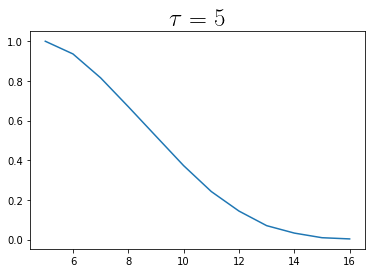

In [27]:
m = Matrix(tau=5, d=10)
solver5 = Solver(matrix=m)
solver5.solve()
stationary = solver5.printFractionStationary()
plt.title('$\\tau=%d$' % m.tau, usetex=True, fontsize=25)
plt.plot(list(range(m.d-m.tau, m.d+m.tau+2)), solver5.stationary);

['1', '428/451', '786/919', '1154/1569', '705/1163', '469/998', '223/654', '332/1445', '26/189', '34/439', '1/29', '5/323', '7/1772', '2/1519']


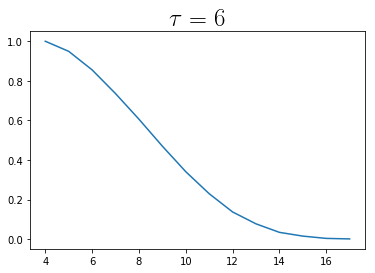

In [26]:
m = Matrix(tau=6, d=10)
solver6 = Solver(matrix=m)
solver6.solve()
solver6.printFractionStationary()
plt.title('$\\tau=%d$' % m.tau, usetex=True, fontsize=25)
plt.plot(list(range(m.d-m.tau, m.d+m.tau+2)), solver6.stationary);

['1', '1789/1869', '3028/3463', '1421/1836', '533/801', '1981/3632', '1095/2561', '165/524', '823/3820', '240/1739', '181/2336', '79/1891', '34/1961', '28/3701', '6/3359', '2/3359']


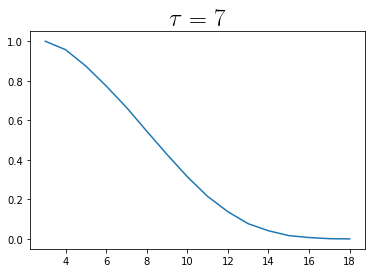

In [28]:
m = Matrix(tau=7, d=10)
solver7 = Solver(matrix=m)
solver7.solve()
solver7.printFractionStationary()
plt.title('$\\tau=%d$' % m.tau, usetex=True, fontsize=25)
plt.plot(list(range(m.d-m.tau, m.d+m.tau+2)), solver7.stationary);

['1', '1789/1869', '3028/3463', '1421/1836', '533/801', '1981/3632', '1095/2561', '165/524', '823/3820', '240/1739', '181/2336', '79/1891', '34/1961', '28/3701', '6/3359', '2/3359']


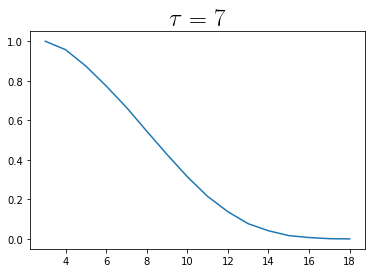

In [29]:
m = Matrix(tau=7, d=10)
solver7 = Solver(matrix=m)
solver7.solve()
solver7.printFractionStationary()
plt.title('$\\tau=%d$' % m.tau, usetex=True, fontsize=25)
plt.plot(list(range(m.d-m.tau, m.d+m.tau+2)), solver7.stationary);

In [34]:
m = Matrix(tau=8, d=10)
solver8 = Solver(matrix=m)
solver8.solve()
solver8.printFractionStationary()

['1', '4163/4318', '3357/3745', '5977/7366', '4708/6565', '3431/5610', '2533/5024', '2819/7126', '2094/7115', '1410/6817', '92/691', '593/7266', '267/6235', '88/3951', '37/4309', '17/4639', '6/7519', '2/7519']


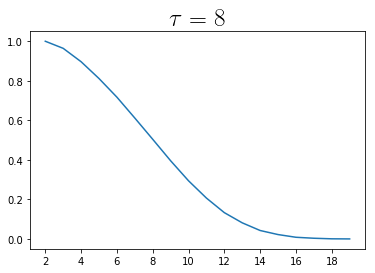

In [35]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('$\\tau=%d$' % m.tau, usetex=True, fontsize=25)
plt.plot(list(range(m.d-m.tau, m.d+m.tau+2)), solver8.stationary);

In [36]:
m = Matrix(tau=9, d=10)
solver9 = Solver(matrix=m)
solver9.solve()
solver9.printFractionStationary()

['1', '399/412', '5303/5849', '2917/3502', '9667/12858', '7109/10773', '7794/13799', '7094/15269', '1441/3917', '2061/7438', '581/2955', '130/981', '813/10046', '679/14227', '248/10481', '137/11488', '46/10637', '27/14920', '3/8149', '1/8149']


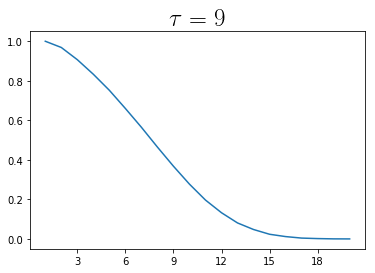

In [37]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('$\\tau=%d$' % m.tau, usetex=True, fontsize=25)
plt.plot(list(range(m.d-m.tau, m.d+m.tau+2)), solver9.stationary);

In [4]:
m = Matrix(tau=10, d=10)
solver10 = Solver(matrix=m)
solver10.solve()
solver10.printFractionStationary()

['1', '24107/24786', '27221/29580', '4873/5692', '7732/9857', '8538/12137', '14653/23697', '3221/6115', '4313/9901', '10617/30710', '7305/27841', '581/3056', '2229/17354', '1972/23663', '418/8671', '178/6477', '221/17197', '155/24577', '54/25145', '27/30526', '5/29764', '1/17859']


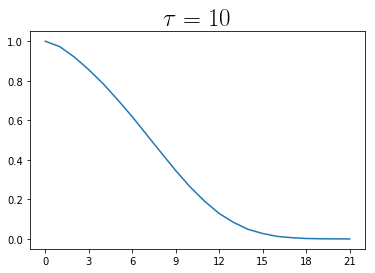

In [39]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('$\\tau=%d$' % m.tau, usetex=True, fontsize=25)
plt.plot(list(range(m.d-m.tau, m.d+m.tau+2)), solver10.stationary);

In [49]:
from matplotlib import rc

In [52]:
solver1 = Solver(matrix=Matrix(tau=1, d=10)); solver1.solve()
solver2 = Solver(matrix=Matrix(tau=2, d=10)); solver2.solve()
solver3 = Solver(matrix=Matrix(tau=3, d=10)); solver3.solve()

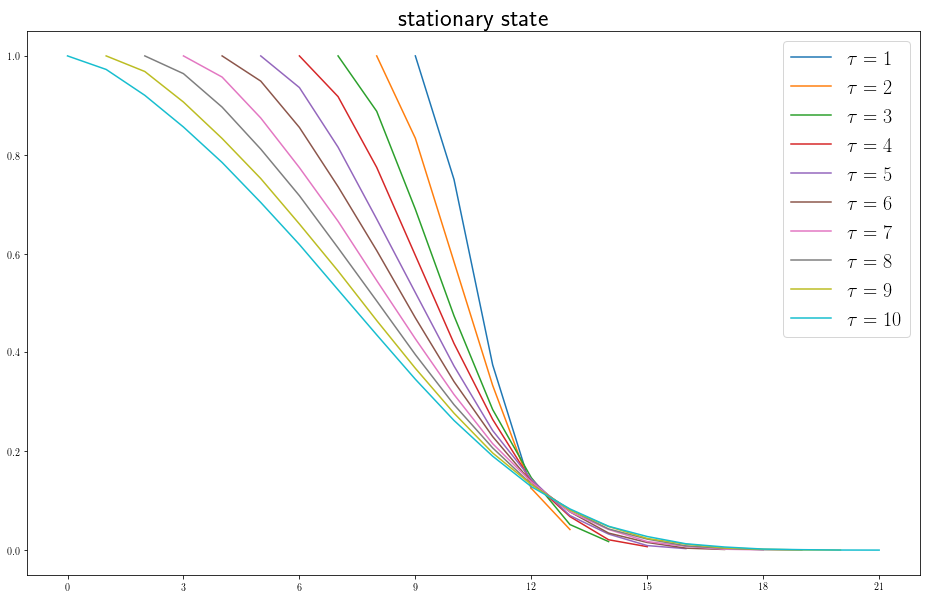

In [89]:
rc('text', usetex=True)

stationaries = [solver1.stationary, solver2.stationary, solver3.stationary, solver4.stationary, solver5.stationary,  
                solver6.stationary, solver7.stationary, solver8.stationary, solver9.stationary, solver10.stationary]

ax = plt.figure(figsize=(16, 10)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('stationary state', fontsize=25)
for i, s in enumerate(stationaries):
    i += 1
    x = list(range(10-i, 10+i+2))
    plt.plot(x, s, label='$\\tau=%d$' % i);
plt.legend(fontsize=20);

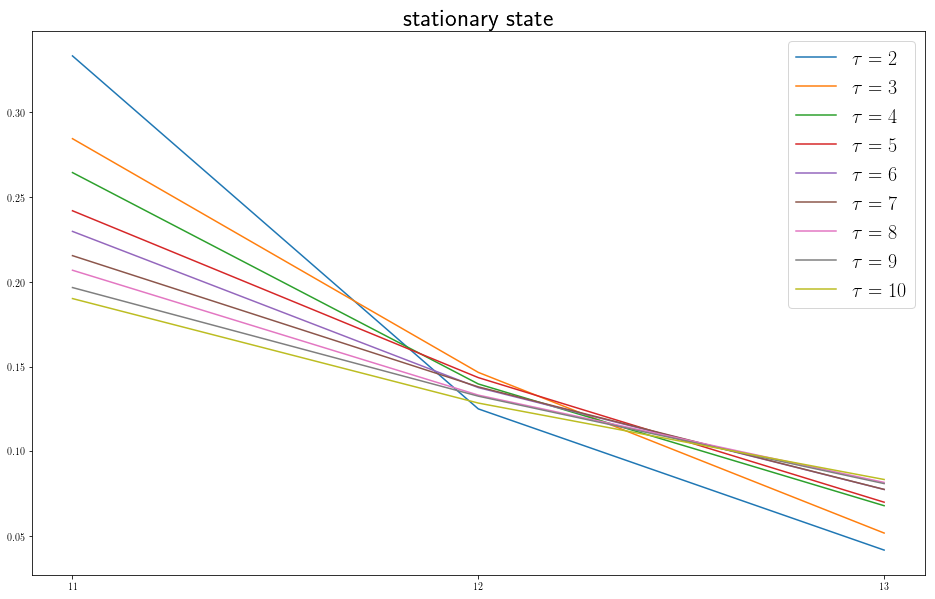

In [90]:
rc('text', usetex=True)

stationaries = [solver1.stationary, solver2.stationary, solver3.stationary, solver4.stationary, solver5.stationary,  
                solver6.stationary, solver7.stationary, solver8.stationary, solver9.stationary, solver10.stationary]

ax = plt.figure(figsize=(16, 10)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('stationary state', fontsize=25)
for i, s in enumerate(stationaries[1:]):
    i += 2
    x = [11, 12, 13]
    plt.plot(x, s[i+1:i+4], label='$\\tau=%d$' % i);
plt.legend(fontsize=20);

In [77]:
# for x = 12
print([s.stationary[s.tau + 2] for s in solvers])

[0.125, 0.125, 0.14655172413793102, 0.13972055888223547, 0.1434640522875817, 0.13756560162797335, 0.138010226921344, 0.1331402887714058, 0.13251782832198472, 0.12844301003163078]


In [79]:
# for x = 12
print([s.stationary[s.tau + 3] for s in solvers[1:]])

[0.04166666666666666, 0.051724137931034475, 0.06786427145708583, 0.06993464052287582, 0.07744882112606652, 0.0774829734938544, 0.0816129880978725, 0.08092773935671872, 0.0833368541599414]


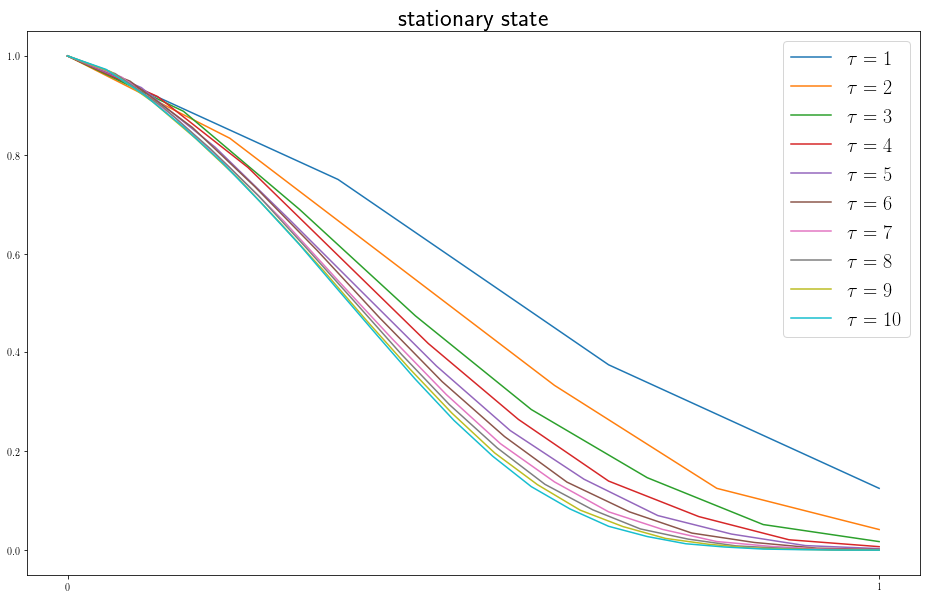

In [87]:
rc('text', usetex=True)

stationaries = [solver1.stationary, solver2.stationary, solver3.stationary, solver4.stationary, solver5.stationary,  
                solver6.stationary, solver7.stationary, solver8.stationary, solver9.stationary, solver10.stationary]

ax = plt.figure(figsize=(16, 10)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('stationary state', fontsize=25)
for i, s in enumerate(stationaries):
    i += 1
    x = np.linspace(0, 1, 2*i+2)
    plt.plot(x, s, label='$\\tau=%d$' % i);
plt.legend(fontsize=20);

In [3]:
stationaries = [np.load('solver1.npy', allow_pickle=True).item().stationary,
                np.load('solver2.npy', allow_pickle=True).item().stationary,
                np.load('solver3.npy', allow_pickle=True).item().stationary,
                np.load('solver4.npy', allow_pickle=True).item().stationary,
                np.load('solver5.npy', allow_pickle=True).item().stationary,  
                np.load('solver6.npy', allow_pickle=True).item().stationary,
                np.load('solver7.npy', allow_pickle=True).item().stationary,
                np.load('solver8.npy', allow_pickle=True).item().stationary,
                np.load('solver9.npy', allow_pickle=True).item().stationary,
                np.load('solver10/solver10-stationary.npy')]

[0.125, 0.042, 0.017, 0.007, 0.003, 0.001, 0.001, 0.0, 0.0, 0.0]


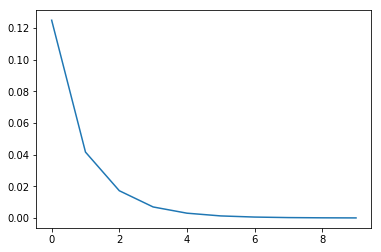

In [28]:
cs = list(map(lambda s: s[len(s)-1], stationaries))
print(list(map(lambda c: round(c, 3), cs)))
plt.plot(cs);

$ab^{-x}$

In [63]:
def score_ab(cs, a, b):
    diff = 0.0
    N = len(cs)
    for i in range(0, N):
        x = i+1
        diff += abs(a * b ** (-x) - cs[i])
    return diff

def mc_run(cs, optim_iter = 10, mc_steps = 50):
    
    # generate random coordinate
    a, b = 0.3365734747250808, 2.6926312966830928

    e1 = score_ab(cs, a, b)
    bestParameters = (a, b)
    bestScore = e1
    
    # Monte Carlo steps
    for i in range(mc_steps): 
        # mutate random property
        what = random.choice(['a', 'b'])
        a2, b2 = a, b
        if what == 'a':
            a2 += random.uniform(-0.0001, 0.0001)
        else:
            b2 += random.uniform(-0.0001, 0.0001)
            
        e2 = score_ab(cs, a2, b2)
        delta = e2-e1
        
        if delta < 0 or np.exp(-delta) > np.random.uniform(): # Metropolis criterion
            a, b = a2, b2
            e1 = e2
            if e1 < bestScore:
                bestParameters = (a, b)
                bestScore = e1

    return bestParameters

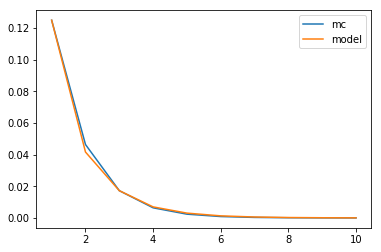

In [64]:
a, b = mc_run(cs, 20, 100000)
tx = list(range(1, 11))
yx = [a * b ** (-x) for x in tx]
plt.plot(tx, yx, label='mc');
plt.plot(tx, cs, label='model');
plt.legend();

In [66]:
print(a, b)
print(score_ab(cs, a, b))

0.3365734747250808 2.6926312966830928
0.006976081010612494


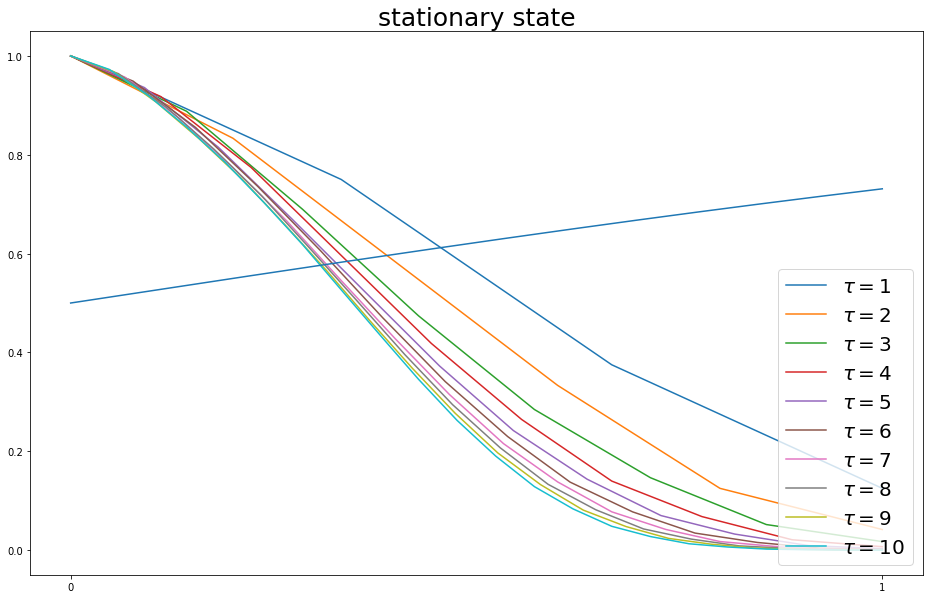

In [10]:
ax = plt.figure(figsize=(16, 10)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('stationary state', fontsize=25)
for i, s in enumerate(stationaries):
    i += 1
    x = np.linspace(0, 1, 2*i+2)
    plt.plot(x, s, label='$\\tau=%d$' % i);
plt.legend(fontsize=20);

In [19]:
def plotResult(stat, parameters):
    tx = np.linspace(0, 1, 1000)
    def fx(x, a, k, s, r, c):
        return (r*(1 + a*np.exp(k*(2*s-1))) / (r + a * np.exp(k*(2*x-1 + 2*s))) + c) / (1+c)
    yx = [fx(x, parameters['a'], parameters['k'], parameters['s'], parameters['r'], parameters['c']) for x in tx]
    plt.plot(tx, yx, label='mc');
    plt.plot(np.linspace(0, 1, len(stat)), stat, label='model');
    plt.legend();

In [82]:
from numpy.random import seed as np_seed
from random import seed as python_seed
import numpy.random as random

def mc_run(score, stat, tau, optim=False, optim_iter = 10, mc_steps = 50, seed=None):
    if seed:
        python_seed(i)
        np_seed(i)

    # generate random coordinate
    parameters = {}
    parameters['a'] = 1.4
    parameters['k'] = 4 
    parameters['s'] = 0.12 
    parameters['r'] = 17/20 
    
    a, b = 0.3365734747250808, 2.6926312966830928
    parameters['c'] = a * b ** (-tau)

    e1 = score(stat, parameters)
    bestParameters = parameters
    bestScore = e1
    
    # Monte Carlo steps
    for i in range(mc_steps): 
        # mutate random property
        what = random.choice(['k', 'a', 's', 'r'])
        parameters2 = parameters.copy()
        stepsize = {'k': 0.02, 'a': 0.01, 's': 0.001, 'r': 0.002}[what]
        parameters2[what] += random.uniform(-stepsize, stepsize)
            
        e2 = score(stat, parameters2)
        delta = e2-e1
        
        if delta < 0 or np.exp(-delta) > np.random.uniform(): # Metropolis criterion
            parameters = parameters2
            e1 = e2
            if e1 < bestScore:
                bestParameters = parameters
                bestScore = e1

    return bestParameters

In [9]:
def score(stat, parameters):
    def fx(x, a, k, s, r, c):
        return (r*(1 + a*np.exp(k*(2*s-1))) / (r + a * np.exp(k*(2*x-1 + 2*s))) + c) / (1 + c)
    
    diff = 0.0
    N = len(stat)
    for i in range(0, N):
        x = i / (N-1)
        diff += abs(stat[i] - fx(x, parameters['a'], parameters['k'], parameters['s'], parameters['r'], parameters['c']))
    return diff

In [68]:
theStationary = stationaries[9]

In [69]:
parameters = mc_run(score, theStationary, 9, mc_steps=100000)
print(parameters)

{'a': 1.4252572214293386, 'k': 3.9225419383588656, 's': 0.11584389579509252, 'r': 0.9092311842931905, 'c': 4.5236384038646816e-05}


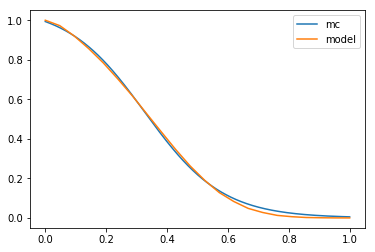

In [70]:
plotResult(theStationary, parameters)

In [71]:
score(theStationary, parameters)

0.23711859182553283

In [103]:
N = 5
aList, kList, sList, rList = np.zeros((10, N)), np.zeros((10, N)), np.zeros((10, N)), np.zeros((10, N))
params = []
for j in range(N):
    for i in range(10):
        parameters = mc_run(score, stationaries[i], tau=i+1, mc_steps=100000)
        aList[i][j] = parameters['a']
        kList[i][j] = parameters['k']
        sList[i][j] = parameters['s']
        rList[i][j] = parameters['r']
        # params.append(parameters)

In [132]:
np.save('rlist', rList)

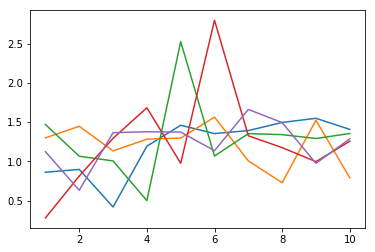

In [106]:
for i in range(N):
    plt.plot(list(range(1, 11)), np.transpose(aList)[i]);

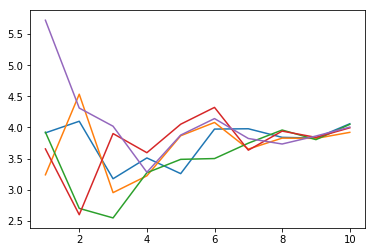

In [107]:
for i in range(N):
    plt.plot(list(range(1, 11)), np.transpose(kList)[i]);

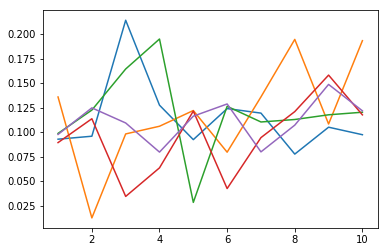

In [108]:
for i in range(N):
    plt.plot(list(range(1, 11)), np.transpose(sList)[i]);

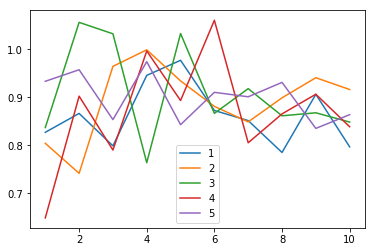

In [120]:
for i in range(N):
    plt.plot(list(range(1, 11)), np.transpose(rList)[i], label=str(i+1));
plt.legend();

In [121]:
chosenList = [4, 0, 4, 3, 3, 4, 0, 4, 4, 4]

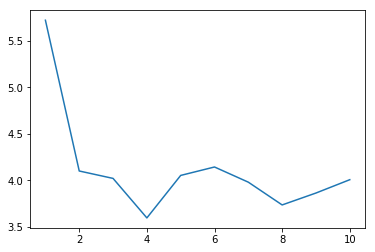

In [122]:
plt.plot(list(range(1, 11)), [kList[x][chosenList[x]] for x in range(10)]);

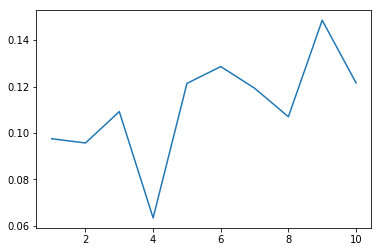

In [123]:
plt.plot(list(range(1, 11)), [sList[x][chosenList[x]] for x in range(10)]);

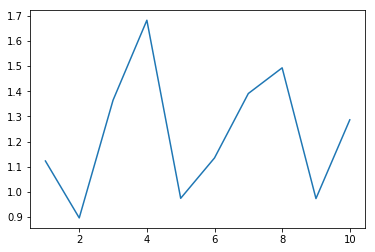

In [124]:
plt.plot(list(range(1, 11)), [aList[x][chosenList[x]] for x in range(10)]);

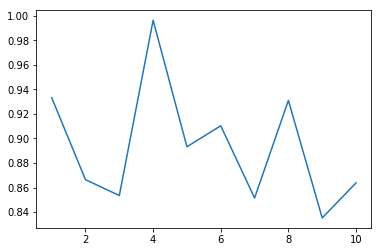

In [125]:
plt.plot(list(range(1, 11)), [rList[x][chosenList[x]] for x in range(10)]);

In [84]:
[score(stationaries[i], params[i]) for i in range(10)]

[0.057893404061483134,
 0.10615070254199623,
 0.08243844257081348,
 0.11888203099213099,
 0.21605665570495278,
 0.14829345819056605,
 0.15793200716108013,
 0.17790951017122575,
 0.28251583668080427,
 0.23713992685992508]

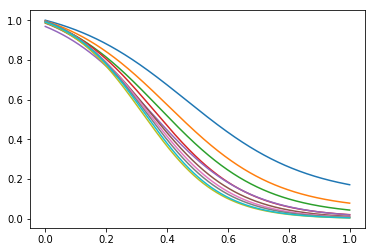

In [85]:
for i in range(10):
    tx = np.linspace(0, 1, 1000)
    def fx(x, a, k, s, r, c):
        return (r*(1 + a*np.exp(k*(2*s-1))) / (r + a * np.exp(k*(2*x-1 + 2*s))) + c) / (1 + c)
    yx = [fx(x, params[i]['a'], params[i]['k'], params[i]['s'], params[i]['r'], params[i]['c']) for x in tx]
    plt.plot(tx, yx);

In [109]:
score(theStationary, parameters)

0.25407886411953745

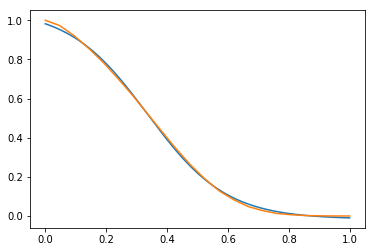

In [16]:
plotResult(theStationary, parameters)

In [71]:
def rightProbability(solver, x):
    def pi(p: Path):
        return '\\pi(%d, %s)' % (p.alpha, p.pathToSigns())
    def partialProbabilities(solver, x):
        def firstInPartial(solver, x):
            segmentPos = (x - (solver.d - solver.tau)) * 2 ** solver.tau
            return segmentPos + 2 ** (solver.tau-1)
        s = firstInPartial(solver, x)
        e = s + 2 ** (solver.tau-1)
        return slice(s, e)
    # for v in solver.v[partialProbabilities(solver, x)]:
    #     print(pi(v))
    return sum(solver.solution[partialProbabilities(solver, x)])

In [73]:
rightProbability(solver4, 11)

0.08582834331337327

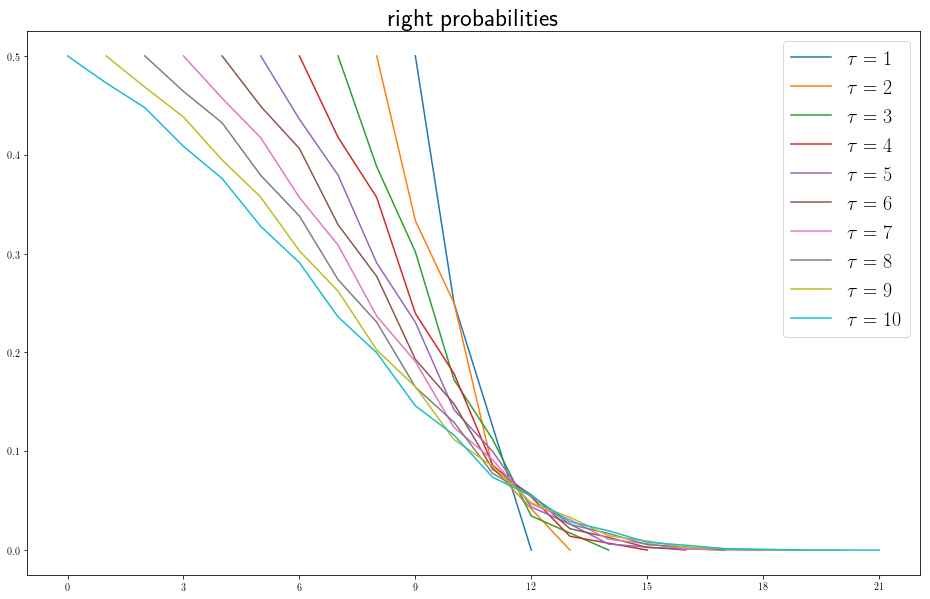

In [74]:
rc('text', usetex=True)

solvers = [solver1, solver2, solver3, solver4, solver5,  
                solver6, solver7, solver8, solver9, solver10]

ax = plt.figure(figsize=(16, 10)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('right probabilities', fontsize=25)
for i, s in enumerate(solvers):
    i += 1
    x = list(range(10-i, 10+i+2))
    y = []
    for xx in x:
        y.append(rightProbability(s, xx))
    plt.plot(x, y, label='$\\tau=%d$' % i);
plt.legend(fontsize=20);

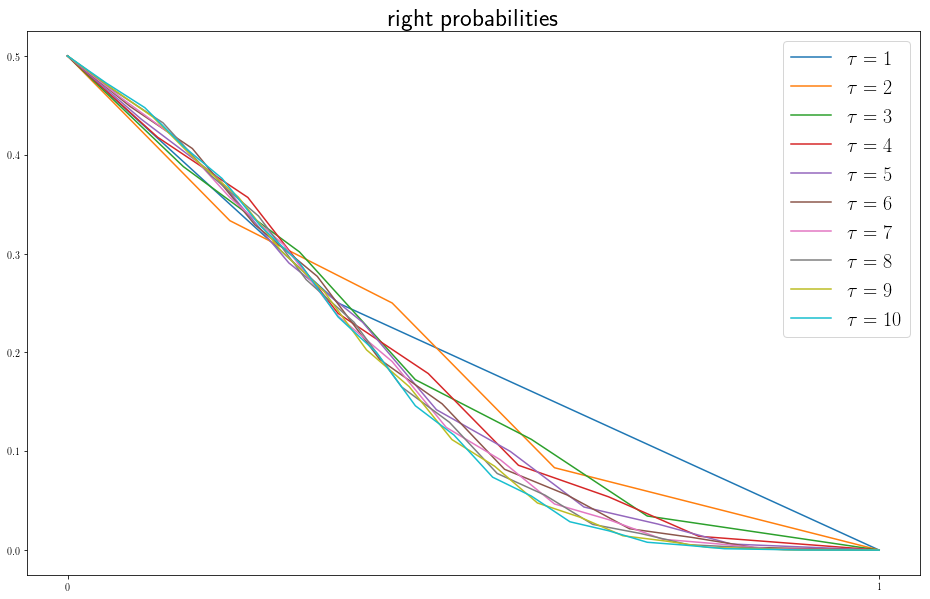

In [91]:
rc('text', usetex=True)

solvers = [solver1, solver2, solver3, solver4, solver5,  
                solver6, solver7, solver8, solver9, solver10]

ax = plt.figure(figsize=(16, 10)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('right probabilities', fontsize=25)
for i, s in enumerate(solvers):
    i += 1
    x = list(range(10-i, 10+i+2))
    y = []
    for xx in x:
        y.append(rightProbability(s, xx))
    plt.plot(np.linspace(0, 1, 2*i+2), y, label='$\\tau=%d$' % i);
plt.legend(fontsize=20);

In [ ]:
for i, s in enumerate(solvers):
    np.save('solver%d' % (i+1), s)

In [6]:
np.save('solver10/solver10-A', solver10.A)
np.save('solver10/solver10-stationary', solver10.stationary)
np.save('solver10/solver10-solution', solver10.solution)
np.save('solver10/solver10-d', solver10.d)
np.save('solver10/solver10-n', solver10.n)
np.save('solver10/solver10-tau', solver10.tau)
np.save('solver10/solver10-numberOfPaths', solver10.numberOfPaths)
np.save('solver10/solver10-v', solver10.v)

In [ ]:
solver10 = Solver()
solver10.A = np.load('solver10/solver10-A.npy')
solver10.stationary = np.load('solver10/solver10-stationary.npy')
solver10.solution = np.load('solver10/solver10-solution.npy')
solver10.d = np.load('solver10/solver10-d.npy')
solver10.n = np.load('solver10/solver10-n.npy')
solver10.tau = np.load('solver10/solver10-tau.npy')
solver10.numberOfPaths = np.load('solver10/solver10-numberOfPaths.npy')
solver10.v = np.load('solver10/solver10-v.npy')

In [113]:
solver1 = np.load('solver1.npy', allow_pickle=True).item()
solver2 = np.load('solver2.npy', allow_pickle=True).item()
solver3 = np.load('solver3.npy', allow_pickle=True).item()
solver4 = np.load('solver4.npy', allow_pickle=True).item()
solver5 = np.load('solver5.npy', allow_pickle=True).item()
solver6 = np.load('solver6.npy', allow_pickle=True).item()
solver7 = np.load('solver7.npy', allow_pickle=True).item()
solver8 = np.load('solver8.npy', allow_pickle=True).item()
solver9 = np.load('solver9.npy', allow_pickle=True).item()

[1.0, 0.75, 0.375, 0.125]

In [7]:
solver1 = np.load('solver1.npy', allow_pickle=True).item()
print(''.join(solver1.printALatex()))

d = 10\\
\pi(9, -) = \pi(9, -)\\
\pi(9, +) = \pi(9, +)\\
\pi(10, -) = \frac{1}{2}\pi(9, -) + \frac{1}{2}\pi(9, +)\\
\pi(10, +) = \frac{1}{2}\pi(11, -) + \pi(11, +)\\
\pi(11, -) = \frac{1}{2}\pi(10, -)\\
\pi(11, +) = \pi(12, -) + \pi(12, +)\\
\pi(12, -) = \frac{1}{2}\pi(11, -)


In [8]:
solver1.solution

array([ 0.5  ,  0.5  ,  0.5  ,  0.25 ,  0.25 ,  0.125,  0.125, -0.   ])